# COEFICIENTES DE ACTIVIDAD
#### NOTEBOOK 2: ECUACIÓN NRTL - APLICADO A MEZCLAS BINARIOS


---


En este notebook corresponde a la resolución de ecuaciones correspondientes en la obtención del coeficiente de actividad bajo el método de la ecuación NRTL para mezclas binarias a diferentes fracciones mol para la generación de diagramas de $\;P-xy\;$, $\;T-xy\;$ y $\;x-y\;$.


También puede utilizarlo para experimentar con otros compuestos en diferentes mezclas, incluyendo modificar las variables de temperatura y presión del sistema para ver en qué puede cambiar los resultados en cuanto a las diagramas $\;P-xy\;$, $\;T-xy\;$ y $\;xy\;$. Modificar las variables correspondientes a diferentes mezclas, consulte en tablas (constantes de la ecuación de Antoine) o artículos de divulgación científica para obtener los otros parámetros de la ecuación de NRTL.


**NOTA IMPORTANTE**: Para ejecutar este programa es necesario tener las librerías _numpy_, _tabulate_ y _matplotlib_.


---


### Resolución de ejercicio


Determine los correspondientes diagramas $\;P-xy\;$, $\;T-xy\;$ y $\;xy\;$ para la mezcla acetona y metanol a una presión de 1 atm y 55°C de temperatura.


DATOS DEL EJERCICIO

a) Constantes de Antoine [1]  
|Compuesto|Cte. 1|Cte. 2|Cte. 3|Cte. 4|Cte. 5|Cte. 6|
|-|-|-|-|-|-|-|
|ACETONA|3.2157|-3969.2218|0|-0.0084|0|2.0|
|METANOL|49.9513|-5970.8229|0|0.0042|0|-5.7920|
$\newline$


b) Parámetros de NRTL (a,b y c) entre los componentes acetona/metanol y metanol/acetona [2]  
$a_{12}\:=\:$0  
$a_{21}\:=\:$0  
$b_{12}\:=\:$101.9  
$b_{21}\:=\:$114.1  
$c_{12}\:=\:$0  
$c_{21}\:=\:$0.3  
$\newline$


FUENTES:  
[1] Correa Henríquez, H. (2010). Anexos Termodinámica de Ingeniería Química. Recuperado en: http://ambiente.usach.cl/jromero/imagenes/Anexos_Libro_Termodinamica_H_Correa.pdf.zip  
[2] Beneke, D., Peters, M., Glasser, D., & Hildebrant, D. (2012). Understanding Distillation Using Column Profile Maps: APPENDIX B: NRTL PARAMETERS AND ANTOINE COEFFICIENTS. John Wiley & Sons, Inc. https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781118477304.app2


- Temperatura (T) = 55°C =328.15 K
- Presión (P) = 1 atm



---


CELDA DE INGRESO DE DATOS AL PROGRAMA

Esta celda es para el ingreso de los datos al programa para resolver las ecuaciones de estado, siga las instrucciones de llenado en los comentarios. Es necesario llenarlo con las unidades que se especifican en el código, sino cuenta con los datos en las unidades que se pidan en el programa es necesario hacer conversiones.


Se recomienda cambiar el valor R (constante de los gases ideales) en caso de que los parámetros de la ecuación del Wilson tengan su correspondiente de la resolución con las unidades correpondientes.


El nombre de la sustancia (variable `COMP`) se escribe entre las comillas simples(`'oxígeno'`,`'ACETONA'`)


In [8]:
import tabulate as tb
import numpy as np
import matplotlib.pyplot as plt

T_SIST=328.15                     #TEMPERATURA DEL SISTEMA QUE SE BUSCA EN DIAGRAMA Pxy (K)
P_SIST=1                          #PRESIÓN DEL SISTEMA QUE SE BUSCA EN DIAGRAMA Txy (atm)

COMP=['ACETONA', 'METANOL']  #COMPONENTES DE LA MEZCLA (1 Y 2)

#INGRESO DE LOS PARAMETROS DE NRTL ENTRE COMPONENTE 1-COMPONENTE 2 Y VICEVERSA
A_NRTL=[0,0]
B_NRTL=[101.9,114.1]
C_NRTL=[0,0.3]

#CONSTANTES DE LAS ECUACIONES DE ANTOINE PARA COMPONENTE 1 Y 2
CA_1=[3.2157,49.9513]
CA_2=[-3969.2218,-5970.8229]
CA_3=[0,0]
CA_4=[-0.0084,0.0042]
CA_5=[0,0]
CA_6=[2.0,-5.7920]

if len(COMP)==len(A_NRTL)==len(B_NRTL)==len(C_NRTL)==len(CA_1)==len(CA_2)==len(CA_3)==len(CA_4)==len(CA_5)==len(CA_6):
    print("*** DATOS INGRESADOS AL PROGRAMA ***")
else:
    print("                 *** ERROR ***")
    print("---------------------------------------------------")
    print(" ASEGURESE DE TENER LA MISMA CANTIDAD DE VARIABLES")
    print("   Y DEBEN TENER DOS EN CADA VARIABLE EN ARREGLO")

*** DATOS INGRESADOS AL PROGRAMA ***


A continuación se describe el procedimiento para la obtención del coeficiente de actividad para la obtención de un diagrama $P-xy$ con su respectivo diagrama $x-y$.


1. Primero se calcula los correspondientes parámetros $\tau_{ij}$ (entre dos compuestos diferentes $i$ y $j$) mediante la siguiente ecuación, mediante la utilización de los coeficientes $a_{ij}$ y $b_{ij}$, función de la temperatura ($T$, $K$).


\begin{equation}
    \tau_{ij}\:=\:a_{ij}\:+\:\frac{b_{ij}}{T}
\end{equation}


En este caso si se tiene dos compuestos en la mezcla, entonces las ecuaciones quedan como:


\begin{equation}
    \tau_{12}\:=\:a_{12}\:+\:\frac{b_{12}}{T}\;\;\;\;\;\;\;\;\;\;\tau_{21}\:=\:a_{21}\:+\:\frac{b_{21}}{T}
\end{equation}


**NOTA:** Esta ecuación puede variar dependiendo de la fuente, sin embargo, este no es la ecuación original para este método de obtención del coeficiente de actividad. Consulte en el archivo _README.md_ para ver las ecuaciones completas.


$\newline$


2. Segundo se obtiene los correspondientes parámetros $G_{ij}$ (entre dos compuestos diferentes $i$ y $j$) mediante la siguiente ecuación, mediante la utilización del coeficiente $c_{ij}$ y el parámetro $\tau_{ij}$.


\begin{equation}
    G_{ij}\:=\:e^{\Large -c_{ij}\tau_{ij}}
\end{equation}


En este caso si se tiene dos compuestos en la mezcla, entonces las ecuaciones quedan como:


\begin{equation}
    G_{12}\:=\:e^{\Large -c_{12}\tau_{12}}\;\;\;\;\;\;\;\;\;\;G_{21}\:=\:e^{\Large -c_{21}\tau_{21}}
\end{equation}


**NOTA:** Esta ecuación puede variar dependiendo de la fuente, sin embargo, este no es la ecuación original para este método de obtención del coeficiente de actividad. Consulte en el archivo _README.md_ para ver las ecuaciones completas.


$\newline$


3. Después, se obtiene la presión de vapor en estado puro ($p°,atm$) en función de la temperatura ($T$, $K$) para cada componente de la mezcla, a partir de la siguiente ecuación de Antoine:


\begin{equation}
    \ln\:p°\:=\:C_{1}\:+\:\frac{C_{2}}{C_{3}\:+\:T}\:+\:C_{4}T\:+\:C_{5}T^{2}\:+\:C_{6} \ln T
\end{equation}


**_NOTA:_** La ecuación y los constantes puede variar dependiendo de la fuente.


$\newline$


4. Posteriormente, se calculan los coeficientes de actividad ($\gamma$) por cada compuesto, correspondiente a la ecuación NRTL.


\begin{equation}
    \ln\gamma_{1}\:=\:x_{2}^{2}\left[\tau_{21}\left(\frac{G_{21}}{x_{1}\:+\:x_{2}G_{21}}\right)^{2}\:+\:\frac{\tau_{12}G_{12}}{\left(x_{2}\:+\:x_{1}G_{12}\right)^{2}}\right]
\end{equation}


\begin{equation}
    \ln\gamma_{2}\:=\:x_{1}^{2}\left[\tau_{12}\left(\frac{G_{12}}{x_{2}\:+\:x_{1}G_{12}}\right)^{2}\:+\:\frac{\tau_{21}G_{21}}{\left(x_{1}\:+\:x_{2}G_{21}\right)^{2}}\right]
\end{equation}


En donde se tiene que:  
$x_{1}\:ó\:x_{2}\;=$Fracción mol de líquido del componente 1 o 2.  
$\gamma_{1}\:ó\:\gamma_{2}\;=$Coeficiente de actividad correspondiente al componente 1 o 2.  


$\newline$


5. Luego se obtiene la presión de vapor de cada componente de la mezcla, a partir de la ecuación de Raoult para mezclas no ideales.


\begin{equation}
    p_{1}\:=\:x_{1}\:\gamma_{1}\:p_{1}^{o}
\end{equation}


\begin{equation}
    p_{2}\:=\:x_{2}\:\gamma_{2}\:p_{2}^{o}
\end{equation}


En donde se tiene que:  
$p_{1}\:o\:p_{2}\:=$Presión de vapor del compuesto correspondiente A o B.  
$x_{1}\:o\:x_{2}\:=$Fracción mol en líquido del compuesto A o B.  
$\gamma_{1}\:o\:\gamma_{2}\:=$Coeficiente de actividad para el compuesto A o B.  
$p_{1}^{o}\:o\:p_{2}^{o}\:=$Presión de vapor del omcpuesto en estado puro correspondiente A o B.  


$\newline$


6. Después se obtiene la presión total ($p_{Total}$) del sistema para cada fracción mol de cada componente de la mezcla, utilizando la ley de Dalton.


\begin{equation}
    p_{Total}\:=\:p_{1}\:+\:p_{2}
\end{equation}


$\newline$


7. Se obtiene el fracción mol del vapor se obtiene entre el cociente de la presión del vapor para el compuesto entre la presión total de la mezcla de vapor, por ejemplo, si se tiene dos compuestos entonces las ecuaciones son:


\begin{equation}
    y_{1}\:=\:\frac{p_{1}}{p_{Total}}
\end{equation}


\begin{equation}
    y_{2}\:=\:\frac{p_{2}}{p_{Total}}
\end{equation}


$\newline$


8. Por último, para obtener el diagrama de equilibrio líquido-vapor se gráfica por cada fracción de un compuesto en fase líquido $x_{1}$ o $x_{2}$ con respecto a la presión total del vapor para obtener la línea de puntos de rocío. Para obtener la línea de puntos de burbuja se gráfica cada fracción de un compuesto en específico en fase vapor $y_{1}$ o $y_{2}$ con respecto a la presión total del vapor. Para obtener el diagrama $x-y$ se gráfica las fracciones mol tanto de la fase líquida de un componente con cada correspondiente de la fase gaseosa como de los mismos del otro componente.


$\newline$


9. A continuación si se requiere comparar el diagrama de equilibrio líquido-vapor utilizando otro modelo como la ecuación de Raoult, entonces se resuelve para dos compuestos. Se tiene que calcular la presión total sin la corrección de no idealidad (sin coeficiente de actividad), para luego obtener la fracción mol de vapor $y_{1}$ o $y_{2}$. Para posteriormente reprtir el procedimiento 


\begin{equation}
    p_{Total}\:=\:x_{1}p_{1}^{o}\:+\:x_{2}p_{2}^{o}
\end{equation}


\begin{equation}
    y_{1}\:=\:\frac{p_{1}}{p_{Total}}
\end{equation}


\begin{equation}
    y_{2}\:=\:\frac{p_{2}}{p_{Total}}
\end{equation}


$\newline$

RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD (C.A.) Y COMPOSICIÓN DE LÍQUIDO
Y VAPOR, CON SU CORRESPONDIENTE PRESIÓN Y TEMPERATURA DE VAPOR, A TEMP. CONSTANTE
(328.15 K) ENTRE ACETONA (X1,γ1,P1,Y1) Y METANOL (X2,γ2,P2,Y2)
-------------------------------------------------------------------------------------

╒════════╤════════╤════════╤════════╤════════════╤════════════╤════════════╤═══════════╤════════╤════════╕
│   X1   │   X2   │  C.A.  │  C.A.  │   P.VAP.   │   P.VAP.   │  P.SIST.   │  T.SIST.  │   Y1   │   Y2   │
│        │        │  (γ1)  │  (γ2)  │  (P1,atm)  │  (P2,atm)  │  (PT,atm)  │    (K)    │        │        │
╞════════╪════════╪════════╪════════╪════════════╪════════════╪════════════╪═══════════╪════════╪════════╡
│ 0.0000 │ 1.0000 │ 1.9314 │ 1.0000 │   0.0000   │   0.6560   │   0.6560   │ 328.1500  │ 0.0000 │ 1.0000 │
├────────┼────────┼────────┼────────┼────────────┼────────────┼────────────┼───────────┼────────┼────────┤
│ 0.0100 │ 0.9900 │ 1.9048 │ 1.0001 │   0.0

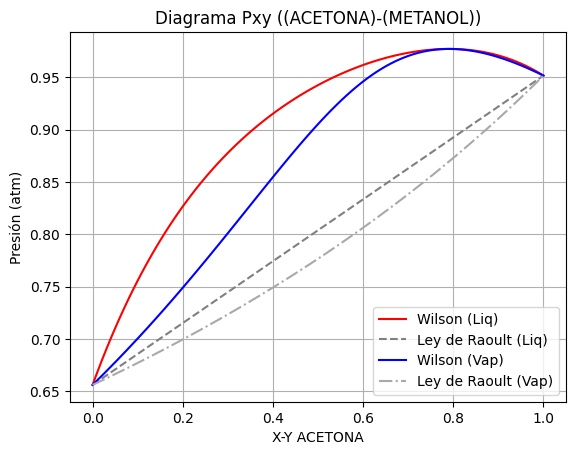

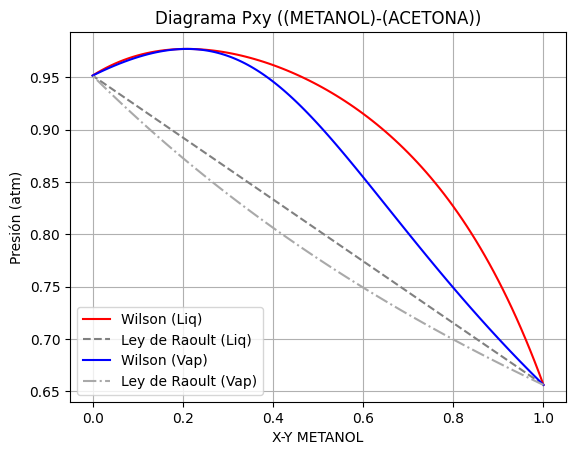

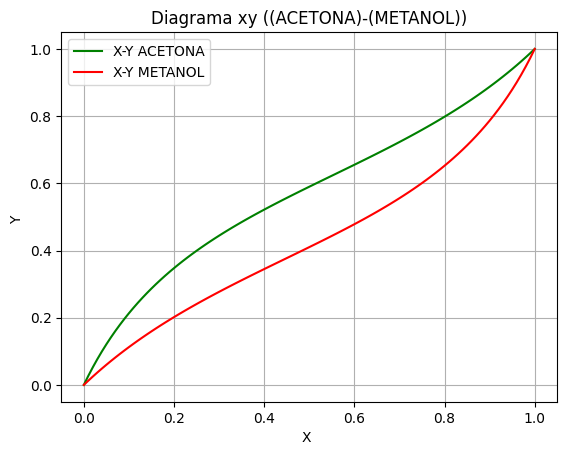

In [7]:
# - CALCULAR LOS CORRESPONDIENTES PARÁMETROS T_ij y G_ij
T_12=A_NRTL[0]+(B_NRTL[0]/T_SIST)
T_21=A_NRTL[1]+(B_NRTL[1]/T_SIST)

G_12=np.exp(-C_NRTL[0]*T_12)
G_21=np.exp(-C_NRTL[1]*T_21)

# - CALCULAR LA PRESIÓN DE VAPOR EN ESTADO PURO DE CADA COMPONENTE
PVAP_P=[]
for i in range(len(CA_1)):
    PVAP_P.append(np.exp(CA_1[i]+(CA_2[i]/(CA_3[i]+T_SIST))+(CA_4[i]*T_SIST)+(CA_5[i]*(T_SIST**2))+(CA_6[i]*(np.log(T_SIST)))))

X1=[]
X2=[]
n=101
for i in range(n):
    X1.append(0.01*i)
    X2.append(1-X1[i])

GAMMA1=[]
GAMMA2=[]
P1=[]
P2=[]
PT=[]
Y1=[]
Y2=[]
PR=[]
YR1=[]
YR2=[]

# - CALCULAR EL COEFICIENTE DE ACTIVIDAD (gamma), PRESÍON DE VAPOR Y FRACCIÓN MOL DE VAPOR DE CADA COMPONENTE DE LA MEZCLA
for i in range(n):
    GAMMA1.append(np.exp((X2[i]**2)*((T_21*((G_21/(X1[i]+(X2[i]*G_21)))**2))+((T_12*G_12)/((X2[i]+(X1[i]*G_12))**2)))))
    GAMMA2.append(np.exp((X1[i]**2)*((T_12*((G_12/(X2[i]+(X1[i]*G_12)))**2))+((T_21*G_21)/((X1[i]+(X2[i]*G_21))**2)))))
    P1.append(X1[i]*GAMMA1[i]*PVAP_P[0])
    P2.append(X2[i]*GAMMA2[i]*PVAP_P[1])
    PT.append(P1[i]+P2[i])
    Y1.append((X1[i]*GAMMA1[i]*PVAP_P[0])/PT[i])
    Y2.append((X2[i]*GAMMA2[i]*PVAP_P[1])/PT[i])
    PR.append((X1[i]*PVAP_P[0])+(X2[i]*PVAP_P[1]))
    YR1.append((X1[i]*PVAP_P[0])/PR[i])
    YR2.append((X2[i]*PVAP_P[1])/PR[i])
    

# - RESUMEN DE RESULTADOS DE LO OBTENIDO EN ESTE PROGRAMA
print(f"RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD (C.A.) Y COMPOSICIÓN DE LÍQUIDO\nY VAPOR, CON SU CORRESPONDIENTE PRESIÓN Y TEMPERATURA DE VAPOR, A TEMP. CONSTANTE\n({T_SIST} K) ENTRE {COMP[0].upper()} (X1,γ1,P1,Y1) Y {COMP[1].upper()} (X2,γ2,P2,Y2)")
print("-------------------------------------------------------------------------------------\n")

ENC_RVD = ["X1", "X2", "C.A.\n(γ1)", "C.A.\n(γ2)", "P.VAP.\n(P1,atm)", "P.VAP.\n(P2,atm)", "P.SIST.\n(PT,atm)", "T.SIST.\n(K)", "Y1", "Y2"]
FIL_RVD = []
for i in range(n):
    FIL_RVD.append([X1[i], X2[i], GAMMA1[i], GAMMA2[i], P1[i], P2[i], PT[i], T_SIST, Y1[i], Y2[i]])
print(tb.tabulate(FIL_RVD, headers=ENC_RVD, tablefmt="fancy_grid", floatfmt=".4f", stralign="center", numalign="center"))

# - GRAFICO DE LOS RESULTADOS DE OBTENIDOS
print(f"\n\nGRÁFICOS CORRESPONDIENTE A TEMPERATURA: {T_SIST} K")
print("------------------------------------------------")
plt.plot(X1,PT, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(X1,PR, color='gray', linestyle='--', label='Ley de Raoult (Liq)')
plt.plot(Y1,PT, color='blue', linestyle='-', label='Wilson (Vap)')
plt.plot(YR1,PR, color='darkgrey', linestyle='-.', label='Ley de Raoult (Vap)')
plt.xlabel(f'X-Y {COMP[0].upper()}')
plt.ylabel('Presión (atm)')
plt.title(f'Diagrama Pxy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X2,PT, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(X2,PR, color='gray', linestyle='--', label='Ley de Raoult (Liq)')
plt.plot(Y2,PT, color='blue', linestyle='-', label='Wilson (Vap)')
plt.plot(YR2,PR, color='darkgrey', linestyle='-.', label='Ley de Raoult (Vap)')
plt.xlabel(f'X-Y {COMP[1].upper()}')
plt.ylabel('Presión (atm)')
plt.title(f'Diagrama Pxy (({COMP[1].upper()})-({COMP[0].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X1,Y1, color='green', label=f'X-Y {COMP[0].upper()}')
plt.plot(X2,Y2, color='red', label=f'X-Y {COMP[1].upper()}')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title(f'Diagrama xy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()


---


A continuación se describe el procedimiento para la obtención del coeficiente de actividad para la obtención de un diagrama $\;T-xy\;$ con su respectivo diagrama $\;x-y\;$. Sin embargo, el procedimiento cambia con respecto al apartado anterior ya que se obtiene la temperatura en donde se obtiene la presión total de la mezcla a la cantidad que se fija como objetivo, utilizando el método de convergencia por Newton-Raphson; con el siguiente procedimiento:


a. Primero se calcula los pasos 1 al 6 se calcula a partir de una temperatura supuesta ($T_{sup}$) (en este caso se puede comenzar en cualquier temperatura).


b. Luego, se calcula un cambio a la temperatura sumpuesta ($T_{sup}'$) (puede utilizar un $\Delta T=1$ o cualquier otra cantidad para obtener un cierto grado de presición de los datos obtenidos).


\begin{equation}
    T_{sup}'\:=\:T_{sup}\:+\:\Delta T
\end{equation}


c. Luego, se vuelve a calcular los pasos 1 al 6 con la nueva temperatura supuesta $T_{sup}'$


d. Posteriormente, se calcula el margen de error de la presión obtenida con las temperaturas supuestas con la presión objetivo. En cuanto obtener E (calculando $p_{calc}$ con $T_{sup}$) tanto E' (calculando $p_{calc}'$ con $T_{sup}'$), se utiliza las siguientes ecuaciones:


\begin{equation}
    E\:=\:E'\:=\:\ln\left(\frac{p_{calc}}{p}\right)
\end{equation}


e. Luego, se obtiene una nueva temperatura supuesta ($T_{Nueva}$) con la ecuación de convergencia de Newton-Raphson propuesta para este caso.


\begin{equation}
    T_{Nueva}\;=\;\frac{T_{sup}T_{sup}'\left(E'\;-\;E\right)}{T_{sup}'E'\;-\;T_{sup}E}
\end{equation}


f. Posteiormente, se repetirá el proceso de los incisos A a la E hasta que el error de la (E con respecto a $T_{sup}$) tenga un resultado igual o menor a la tolerancia marcada en el programa


g. Por último, ya obtenido las presiones parciales de cada componente y la temperatura para alcanzar la presión objetivo se procede con el paso 7 para obtener su correspondiente fracción mol del gas.


h. Para graficar el diagrama $T-xy$ se debe de repetir los incisos a hasta g con cada una de las fracciones mol en fase líquido entre los dos compuestos, siguiendo el paso 8.


$\newline$


Para la obtención de los coeficientes de actividad con la ecuación NRTL.


1. Primero se calcula los correspondientes parámetros $\tau_{ij}$ (entre dos compuestos diferentes $i$ y $j$) mediante la siguiente ecuación, mediante la utilización de los coeficientes $a_{ij}$ y $b_{ij}$, función de la temperatura ($T$, $K$).


\begin{equation}
    \tau_{ij}\:=\:a_{ij}\:+\:\frac{b_{ij}}{T}
\end{equation}


En este caso si se tiene dos compuestos en la mezcla, entonces las ecuaciones quedan como:


\begin{equation}
    \tau_{12}\:=\:a_{12}\:+\:\frac{b_{12}}{T}\;\;\;\;\;\;\;\;\;\;\tau_{21}\:=\:a_{21}\:+\:\frac{b_{21}}{T}
\end{equation}


**NOTA:** Esta ecuación puede variar dependiendo de la fuente, sin embargo, este no es la ecuación original para este método de obtención del coeficiente de actividad. Consulte en el archivo _README.md_ para ver las ecuaciones completas.


$\newline$


2. Segundo se obtiene los correspondientes parámetros $G_{ij}$ (entre dos compuestos diferentes $i$ y $j$) mediante la siguiente ecuación, mediante la utilización del coeficiente $c_{ij}$ y el parámetro $\tau_{ij}$.


\begin{equation}
    G_{ij}\:=\:e^{\Large -c_{ij}\tau_{ij}}
\end{equation}


En este caso si se tiene dos compuestos en la mezcla, entonces las ecuaciones quedan como:


\begin{equation}
    G_{12}\:=\:e^{\Large -c_{12}\tau_{12}}\;\;\;\;\;\;\;\;\;\;G_{21}\:=\:e^{\Large -c_{21}\tau_{21}}
\end{equation}


**NOTA:** Esta ecuación puede variar dependiendo de la fuente, sin embargo, este no es la ecuación original para este método de obtención del coeficiente de actividad. Consulte en el archivo _README.md_ para ver las ecuaciones completas.


$\newline$


3. Después, se obtiene la presión de vapor en estado puro ($p°,atm$) en función de la temperatura ($T$, $K$) para cada componente de la mezcla, a partir de la siguiente ecuación de Antoine:


\begin{equation}
    \ln\:p°\:=\:C_{1}\:+\:\frac{C_{2}}{C_{3}\:+\:T}\:+\:C_{4}T\:+\:C_{5}T^{2}\:+\:C_{6} \ln T
\end{equation}


**_NOTA:_** La ecuación y los constantes puede variar dependiendo de la fuente.


$\newline$


4. Posteriormente, se calculan los coeficientes de actividad ($\gamma$) por cada compuesto, correspondiente a la ecuación NRTL.


\begin{equation}
    \ln\gamma_{1}\:=\:x_{2}^{2}\left[\tau_{21}\left(\frac{G_{21}}{x_{1}\:+\:x_{2}G_{21}}\right)^{2}\:+\:\frac{\tau_{12}G_{12}}{\left(x_{2}\:+\:x_{1}G_{12}\right)^{2}}\right]
\end{equation}


\begin{equation}
    \ln\gamma_{2}\:=\:x_{1}^{2}\left[\tau_{12}\left(\frac{G_{12}}{x_{2}\:+\:x_{1}G_{12}}\right)^{2}\:+\:\frac{\tau_{21}G_{21}}{\left(x_{1}\:+\:x_{2}G_{21}\right)^{2}}\right]
\end{equation}


En donde se tiene que:  
$x_{1}\:ó\:x_{2}\;=$Fracción mol de líquido del componente 1 o 2.  
$\gamma_{1}\:ó\:\gamma_{2}\;=$Coeficiente de actividad correspondiente al componente 1 o 2.  


$\newline$


5. Luego se obtiene la presión de vapor de cada componente de la mezcla, a partir de la ecuación de Raoult para mezclas no ideales.


\begin{equation}
    p_{1}\:=\:x_{1}\:\gamma_{1}\:p_{1}^{o}
\end{equation}


\begin{equation}
    p_{2}\:=\:x_{2}\:\gamma_{2}\:p_{2}^{o}
\end{equation}


En donde se tiene que:  
$p_{1}\:o\:p_{2}\:=$Presión de vapor del compuesto correspondiente A o B.  
$x_{1}\:o\:x_{2}\:=$Fracción mol en líquido del compuesto A o B.  
$\gamma_{1}\:o\:\gamma_{2}\:=$Coeficiente de actividad para el compuesto A o B.  
$p_{1}^{o}\:o\:p_{2}^{o}\:=$Presión de vapor del omcpuesto en estado puro correspondiente A o B.  


$\newline$


6. Después se obtiene la presión total ($p_{Total}$) del sistema para cada fracción mol de cada componente de la mezcla, utilizando la ley de Dalton.


\begin{equation}
    p_{Total}\:=\:p_{1}\:+\:p_{2}
\end{equation}


$\newline$


7. Se obtiene el fracción mol del vapor se obtiene entre el cociente de la presión del vapor para el compuesto entre la presión total de la mezcla de vapor, por ejemplo, si se tiene dos compuestos entonces las ecuaciones son:


\begin{equation}
    y_{1}\:=\:\frac{p_{1}}{p_{Total}}
\end{equation}


\begin{equation}
    y_{2}\:=\:\frac{p_{2}}{p_{Total}}
\end{equation}


$\newline$


8. Por último, para obtener el diagrama de equilibrio líquido-vapor se gráfica por cada fracción de un compuesto en fase líquido $x_{1}$ o $x_{2}$ con respecto a la presión total del vapor para obtener la línea de puntos de rocío. Para obtener la línea de puntos de burbuja se gráfica cada fracción de un compuesto en específico en fase vapor $y_{1}$ o $y_{2}$ con respecto a la presión total del vapor. Para obtener el diagrama $x-y$ se gráfica las fracciones mol tanto de la fase líquida de un componente con cada correspondiente de la fase gaseosa como de los mismos del otro componente.


$\newline$


9. A continuación si se requiere comparar el diagrama de equilibrio líquido-vapor utilizando otro modelo como la ecuación de Raoult, entonces se resuelve para dos compuestos. Se tiene que calcular la presión total sin la corrección de no idealidad (sin coeficiente de actividad), para luego obtener la fracción mol de vapor $y_{1}$ o $y_{2}$. Para posteriormente reprtir el procedimiento 


\begin{equation}
    p_{Total}\:=\:x_{1}p_{1}^{o}\:+\:x_{2}p_{2}^{o}
\end{equation}


\begin{equation}
    y_{1}\:=\:\frac{p_{1}}{p_{Total}}
\end{equation}


\begin{equation}
    y_{2}\:=\:\frac{p_{2}}{p_{Total}}
\end{equation}


$\newline$

RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD (C.A.) Y COMPOSICIÓN DE LÍQUIDO
Y VAPOR, CON SU CORRESPONDIENTE PRESIÓN Y TEMPERATURA DE VAPOR, A PRESIÓN CONSTANTE
(1 atm) ENTRE ACETONA (X1,γ1,P1,Y1) Y METANOL (X2,γ2,P2,Y2)
-------------------------------------------------------------------------------------

╒════════╤═════════╤════════╤════════╤════════════╤════════════╤════════════╤═══════════╤════════╤═════════╕
│   X1   │   X2    │  C.A.  │  C.A.  │   P.VAP.   │   P.VAP.   │  P.SIST.   │  T.SIST.  │   Y1   │   Y2    │
│        │         │  (γ1)  │  (γ2)  │  (P1,atm)  │  (P2,atm)  │  (PT,atm)  │    (K)    │        │         │
╞════════╪═════════╪════════╪════════╪════════════╪════════════╪════════════╪═══════════╪════════╪═════════╡
│ 0.0000 │ 1.0000  │ 1.8927 │ 1.0000 │   0.0000   │   1.0000   │   1.0000   │ 338.5435  │ 0.0000 │ 1.0000  │
├────────┼─────────┼────────┼────────┼────────────┼────────────┼────────────┼───────────┼────────┼─────────┤
│ 0.0100 │ 0.9900  │ 1.8689 │ 1.

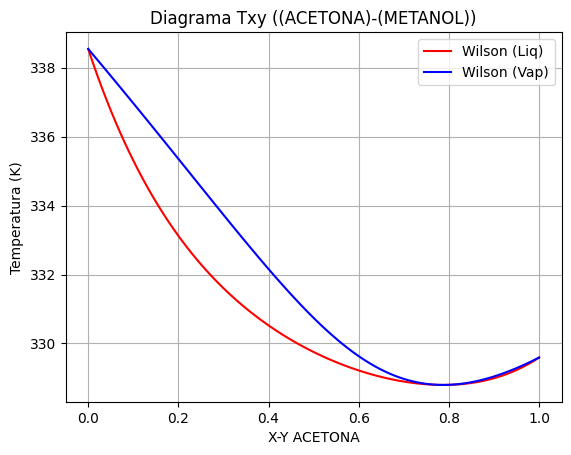

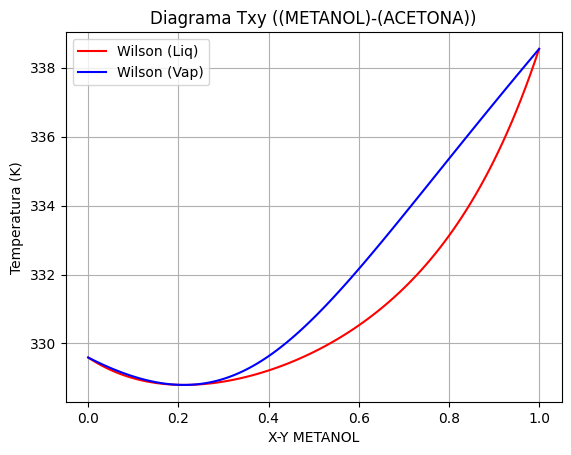

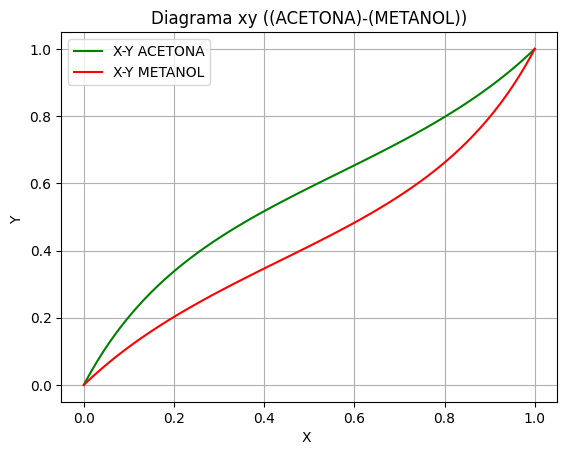

In [6]:
P_OBJ=P_SIST

TF_S=[]
X1_S=[]
X2_S=[]
GAMMA1_S=[]
GAMMA2_S=[]
P1_S=[]
P2_S=[]
PT_S=[]
Y1_S=[]
Y2_S=[]

X1=0
TOL=0.000001
while X1<=1.01:
    X2=1-X1
    T=273
    ERROR=1
    while abs(ERROR)>TOL:
        # - CALCULAR EL PARÁMETRO TAU_ij EN FUNCION A LA T INICIAL Ó MODIFICADA
        T_12=A_NRTL[0]+(B_NRTL[0]/T)
        T_21=A_NRTL[1]+(B_NRTL[1]/T)
        # - CALCULO DEL PARÁMETRO G_ij EN FUNCIÓN DEL PARÁMETRO T_ij
        G_12=np.exp(-C_NRTL[0]*T_12)
        G_21=np.exp(-C_NRTL[1]*T_21)
        # - CALCULAR LOS COEFICIENTES DE ACTIVIDAD A LA T INICIAL Ó MODIFICADA
        GAMMA1=(np.exp((X2**2)*((T_21*((G_21/(X1+(X2*G_21)))**2))+((T_12*G_12)/((X2+(X1*G_12))**2)))))
        GAMMA2=(np.exp((X1**2)*((T_12*((G_12/(X2+(X1*G_12)))**2))+((T_21*G_21)/((X1+(X2*G_21))**2)))))
        # - CALCULAR DE PRESION DE VAPOR PURA A LA T INICIAL Ó MODIFICADA
        PVAP_P1=(np.exp(CA_1[0]+(CA_2[0]/(CA_3[0]+T))+(CA_4[0]*T)+(CA_5[0]*(T**2))+(CA_6[0]*(np.log(T)))))
        PVAP_P2=(np.exp(CA_1[1]+(CA_2[1]/(CA_3[1]+T))+(CA_4[1]*T)+(CA_5[1]*(T**2))+(CA_6[1]*(np.log(T)))))
        # - CALCULAR LAS PRESIONES PARCIALES INICIALES Ó MODIFICADAS
        P1=X1*GAMMA1*PVAP_P1
        P2=X2*GAMMA2*PVAP_P2
        # - CALCULAR LA PRESIÓN TOTAL INICIAL Ó MODIFICADA
        PT=P1+P2
        
        # * NUEVA TEMPERATURA PARA OBTENER LA NUEVA TEMPERATURA MODIFICADA
        T_N=T+0.1
        # * CALCULAR EL PARÁMETRO TAU_ij EN FUNCION A LA T INICIAL Ó MODIFICADA
        T_12_N=A_NRTL[0]+(B_NRTL[0]/T_N)
        T_21_N=A_NRTL[1]+(B_NRTL[1]/T_N)
        # * CALCULO DEL PARÁMETRO G_ij EN FUNCIÓN DEL PARÁMETRO T_ij
        G_12_N=np.exp(-C_NRTL[0]*T_12)
        G_21_N=np.exp(-C_NRTL[1]*T_21)
        # * CALCULAR LOS COEFICIENTES DE ACTIVIDAD A LA T NUEVA
        GAMMA1_N=(np.exp((X2**2)*((T_21_N*((G_21_N/(X1+(X2*G_21_N)))**2))+((T_12_N*G_12_N)/((X2+(X1*G_12_N))**2)))))
        GAMMA2_N=(np.exp((X1**2)*((T_12_N*((G_12_N/(X2+(X1*G_12_N)))**2))+((T_21_N*G_21_N)/((X1+(X2*G_21_N))**2)))))
        # * CALCULAR DE PRESION DE VAPOR PURA A LA T NUEVA
        PVAP_P1_N=(np.exp(CA_1[0]+(CA_2[0]/(CA_3[0]+T_N))+(CA_4[0]*T_N)+(CA_5[0]*(T_N**2))+(CA_6[0]*(np.log(T_N)))))
        PVAP_P2_N=(np.exp(CA_1[1]+(CA_2[1]/(CA_3[1]+T_N))+(CA_4[1]*T_N)+(CA_5[1]*(T_N**2))+(CA_6[1]*(np.log(T_N)))))
        # * CALCULAR LAS PRESIONES PARCIALES NUEVAS
        P1_N=X1*GAMMA1_N*PVAP_P1_N
        P2_N=X2*GAMMA2_N*PVAP_P2_N
        # * CALCULAR LA PRESIÓN TOTAL NUEVA
        PT_N=P1_N+P2_N
        # * CALCULAR EL ERROR OBTENIDO A PARTIR DE LA TEMPERATURA INICIAL Y TEMPERATURA FINAL PARA OBTENER UNA TEMPERATURA MODIFICADA
        ERROR=np.log(PT/P_OBJ)
        E_N=np.log(PT_N/P_OBJ)
        T_MOD=(T*T_N*(E_N-ERROR))/(T_N*E_N-T*ERROR)
        T=T_MOD

    # + SE OBTIENE LA CORRESPONDIENTE FRACCIÓN MOL DEL GAS UNA VEZ OBTENIDA LA TEMPERATURA PARA OBTENER LA PRESIÓN OBJETIVO Y GUARDAR LOS DATOS EN ARREGLOS
    Y1=P1/PT
    Y2=P2/PT
    TF_S.append(T)
    X1_S.append(X1)
    X2_S.append(X2)
    GAMMA1_S.append(GAMMA1)
    GAMMA2_S.append(GAMMA2)
    P1_S.append(P1)
    P2_S.append(P2)
    PT_S.append(PT)
    Y1_S.append(Y1)
    Y2_S.append(Y2)
    
    # + CAMBIO DE LA FRACCIÓN MOL EN LÍQUIDO DE UNO DE LOS COMPONENTES
    X1=X1+0.01

# - OBTENCIÓN TANTO DE LA TABLA DE RESULTADOS Y LOS DIAGRAMAS CORRESPONDIENTES
print(f"RESUMEN DE RESULTADOS DE COEFICIENTES DE ACTIVIDAD (C.A.) Y COMPOSICIÓN DE LÍQUIDO\nY VAPOR, CON SU CORRESPONDIENTE PRESIÓN Y TEMPERATURA DE VAPOR, A PRESIÓN CONSTANTE\n({P_SIST} atm) ENTRE {COMP[0].upper()} (X1,γ1,P1,Y1) Y {COMP[1].upper()} (X2,γ2,P2,Y2)")
print("-------------------------------------------------------------------------------------\n")

ENC_RVD = ["X1", "X2","C.A.\n(γ1)","C.A.\n(γ2)", "P.VAP.\n(P1,atm)", "P.VAP.\n(P2,atm)", "P.SIST.\n(PT,atm)", "T.SIST.\n(K)", "Y1", "Y2"]
FIL_RVD = []
for i in range(len(X1_S)):
    FIL_RVD.append([X1_S[i], X2_S[i], GAMMA1_S[i], GAMMA2_S[i], P1_S[i], P2_S[i], PT_S[i], TF_S[i], Y1_S[i], Y2_S[i]])
print(tb.tabulate(FIL_RVD, headers=ENC_RVD, tablefmt="fancy_grid", floatfmt=".4f", stralign="center", numalign="center"))

# - GRAFICO DE LOS RESULTADOS DE OBTENIDOS
print(f"\n\nGRÁFICOS CORRESPONDIENTE A PRESIÓN: {P_OBJ} atm")
print("------------------------------------------------")
plt.plot(X1_S,TF_S, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(Y1_S,TF_S, color='blue', linestyle='-', label='Wilson (Vap)')
plt.xlabel(f'X-Y {COMP[0].upper()}')
plt.ylabel('Temperatura (K)')
plt.title(f'Diagrama Txy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X2_S,TF_S, color='red', linestyle='-', label='Wilson (Liq)')
plt.plot(Y2_S,TF_S, color='blue', linestyle='-', label='Wilson (Vap)')
plt.xlabel(f'X-Y {COMP[1].upper()}')
plt.ylabel('Temperatura (K)')
plt.title(f'Diagrama Txy (({COMP[1].upper()})-({COMP[0].upper()}))')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(X1_S,Y1_S, color='green', label=f'X-Y {COMP[0].upper()}')
plt.plot(X2_S,Y2_S, color='red', label=f'X-Y {COMP[1].upper()}')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title(f'Diagrama xy (({COMP[0].upper()})-({COMP[1].upper()}))')
plt.legend()
plt.grid(True)
plt.show()
